## Observations

1. As we approach the equator it is very likely for temperature to increase according to our data.
2. Cloudiness has a tendency to be measured at the following values: 0, 20, 40, 75, 90, and 100.
3. There does not seem to be any correlation between wind speed and latitude.

## Note
Although latitude would be considered the independant variable and would typically be plotted on the x-axis, I made a visual choice to plot it on the y-axis throughout the notebook because that's how latitude is represented in most maps.


# WeatherPy

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import random
from pprint import pprint
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

## Generate Cities List

* The bounds of Latitude are -90 and 90 degrees inclusive

* The bounds of Longitude are -180 and 180 degrees inclusive

In [2]:
#This method is consistently giving me around 600 unique random cities

#Generate a long list of cities based off of random lat and long
CityList=[]
for i in range(1500):
    Lat=random.uniform(-90,90)
    Long=random.uniform(-180,180)
    CityList.append([Lat,Long,citipy.nearest_city(Lat,Long)])

#Go through the list of cities removing duplicates.
for i in range(len(CityList)-1,0,-1):
    CurrentCity=CityList[i][2]
    for j in range(i-1,-1,-1):
        if CityList[j][2]==CurrentCity:
            CityList.pop(i)
            break

print(len(CityList))

#Since the actual Lat and Long can be off by quite a bit and we are planning to use Lat for plotting
#I will loop through the remaining list and replace the random lat and long with the lat and long for the
#unique random city.

KeyList=list(citipy.WORLD_CITIES_DICT.keys())
ValueList=list(citipy.WORLD_CITIES_DICT.values())

for x in CityList:
    NewLatLong=KeyList[ValueList.index(x[2])]
    x[0]=NewLatLong[0]
    x[1]=NewLatLong[1]

print(len(CityList))
#No need to store these
del KeyList, ValueList

606
606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).
* Create a dataframe as you go.


In [3]:
#Blank dataframe that will fill in as we go
cities_df = pd.DataFrame({
    "City": [], "Latitude": [], "Longitude": [],"Temperature (F)": [], "Humidity (%)": [], "Cloudiness (%)": [], "Wind_Speed (mph)": []})

print("Pulling data with OpenWeather API")
CityLength=len(CityList)
for i,City in enumerate(CityList):
    lat=City[0]
    lon=City[1]
    url=f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
    print(f"Collecting data for city {i+1} of {CityLength}: {City[2].city_name}.")
    try:
        response = requests.get(url).json()
        temp=response['main']['temp']
        humid=response['main']['humidity']
        cloud=response['clouds']['all']
        wind=response['wind']['speed']

        line_df= pd.DataFrame([{"City": City[2].city_name, "Latitude": lat, "Longitude": lon,"Temperature (F)": response['main']['temp'], "Humidity (%)": response['main']['humidity'], "Cloudiness (%)": response['clouds']['all'], "Wind_Speed (mph)": response['wind']['speed']}])
        cities_df=cities_df.append(line_df,ignore_index=True)

    except:
        print("No Data for that Lat and Long")

Pulling data with OpenWeather API


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df.to_csv("Output/2020Oct26weather.csv",encoding="utf-8", index=False, header=True)
cities_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind_Speed (mph)
0,atuona,-9.800000,-139.033333,78.91,76.0,86.0,19.69
1,rikitea,-23.120278,-134.969167,75.34,85.0,100.0,19.24
2,karauzyak,43.027500,60.012500,48.20,61.0,0.0,4.70
3,punta arenas,-53.150000,-70.916667,55.40,37.0,20.0,34.45
4,pathein,16.783333,94.733333,75.83,90.0,0.0,4.36


## Inspect the data and remove the cities with oddities.
 * Humidity over 100?
 * Cloudiness over 100?

In [5]:
print(cities_df["Humidity (%)"].max())
print(cities_df["Cloudiness (%)"].max())
print(cities_df.count())

100.0
100.0
City                606
Latitude            606
Longitude           606
Temperature (F)     606
Humidity (%)        606
Cloudiness (%)      606
Wind_Speed (mph)    606
dtype: int64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

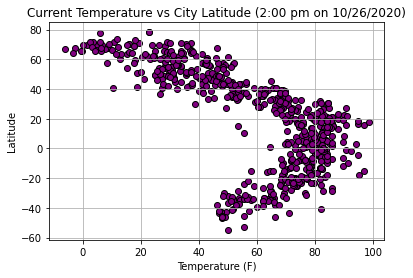

In [13]:
#I think that plotting Latitude on the Y - axis works better visually

plt.scatter(cities_df["Temperature (F)"], cities_df["Latitude"], marker="o", facecolors="purple", edgecolors="black")
plt.title("Current Temperature vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig("Output/10262020TempVsAllLat.png")
plt.show()

It appears that temperature and latitude are definitely correlated. As we approach the equator from above or below, the temp appears to increase. This will be more visible when split by hemishpere.

## Latitude vs. Humidity Plot

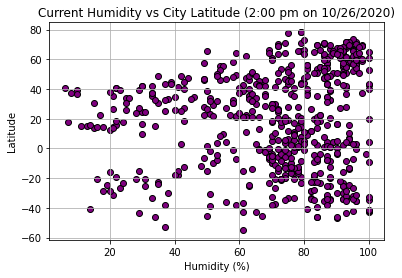

In [14]:
plt.scatter(cities_df["Humidity (%)"], cities_df["Latitude"], marker="o", facecolors="purple", edgecolors="black")
plt.title("Current Humidity vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig("Output/10262020HumidVsAllLat.png")
plt.show()

Humidity and Latitude do not appear to be correlated. It appears that there are some data clusters and that may represent data from nearby cities.

## Latitude vs. Cloudiness Plot

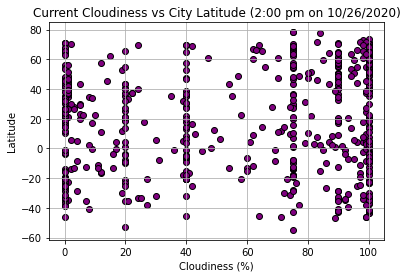

In [15]:
plt.scatter(cities_df["Cloudiness (%)"], cities_df["Latitude"], marker="o", facecolors="purple", edgecolors="black")
plt.title("Current Cloudiness vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig("Output/10262020CloudinessVsAllLat.png")
plt.show()

Cloudiness and latitude don't seem correlated at all. There are major clumps at 0, 20, 40, 75, 90, and 100. These are likely common categories that people use (not cloudy, slightly cloudy, mostly cloudy, cloudy, etc.)

## Latitude vs. Wind Speed Plot

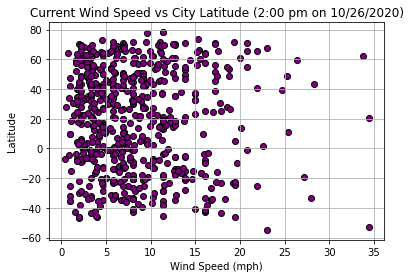

In [16]:
plt.scatter(cities_df["Wind_Speed (mph)"], cities_df["Latitude"], marker="o", facecolors="purple", edgecolors="black")
plt.title("Current Wind Speed vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.savefig("Output/10262020WindSpeedVsAllLat.png")
plt.show()

Wind Speed does not appear to be correlated to latitude at all. 

## Linear Regression

In [19]:
#Creating a dataframe for northern cities and for southern cities
Ncities_df=cities_df.loc[cities_df["Latitude"]>=0,:]
print(Ncities_df.count())
Scities_df=cities_df.loc[cities_df["Latitude"]<=0,:]
print(Scities_df.count())

City                408
Latitude            408
Longitude           408
Temperature (F)     408
Humidity (%)        408
Cloudiness (%)      408
Wind_Speed (mph)    408
dtype: int64
City                198
Latitude            198
Longitude           198
Temperature (F)     198
Humidity (%)        198
Cloudiness (%)      198
Wind_Speed (mph)    198
dtype: int64


This is really interesting. Due to the distribution of inhabitable land on Earth, a random point in the southern hemisphere is more likely to have the same city be nearest to it as another random point in the southern hemisphere. This is a result of having minimal cities sitting in the ocean!

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8837470661958846


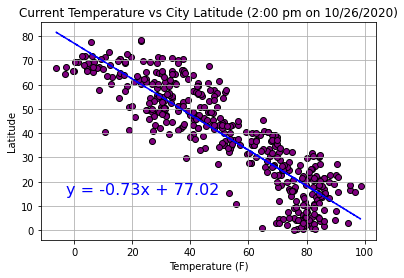

In [37]:
Temp=Ncities_df["Temperature (F)"]
Lat=Ncities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Temperature vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-3,15),size=16,c='b')
plt.savefig("Output/10262020TempVsNorthLat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7716402165455459


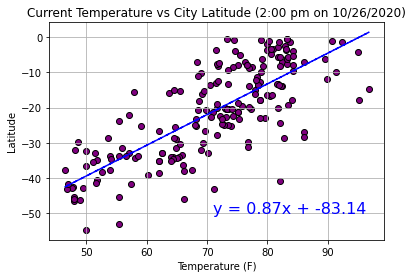

In [41]:
Temp=Scities_df["Temperature (F)"]
Lat=Scities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Temperature vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(71,-50),size=16,c='b')
plt.savefig("Output/10262020TempVsSouthLat.png")
plt.show()

The r value shows a strong correlation between temp and latitude, giving clear evidence that as we get closer the the equator, it does get hotter. The correlation is not as strong in the southern hemisphere. Since October is past the fall equinox, the sun is not shining directly on the equator, it is focused on the southern hemisphere as well.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30277651006484907


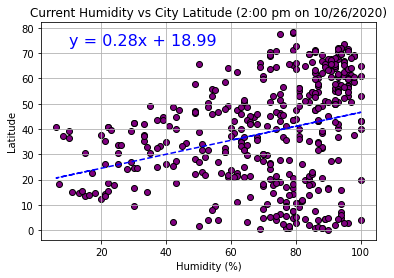

In [45]:
Temp=Ncities_df["Humidity (%)"]
Lat=Ncities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Humidity vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(10,73),size=16,c='b')
plt.savefig("Output/10262020HumidityVsNorthLat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.013404086725903827


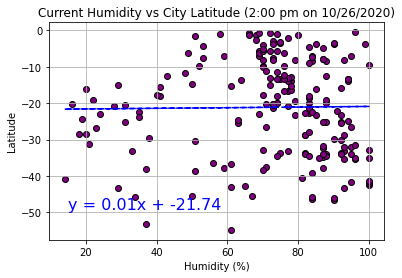

In [50]:
Temp=Scities_df["Humidity (%)"]
Lat=Scities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Humidity vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(15,-49),size=16,c='b')
plt.savefig("Output/10262020HumidityVsSouthLat.png")
plt.show()

There does not appear to be a strong correlation with latitude and humidity. In the northern hemisphere, the humidity is weakly correlated- hinting that it is drier as we approach the equator, but not strong enough to prove. In the southern hemisphere, the humidity does not seem correlated.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15538981794981382


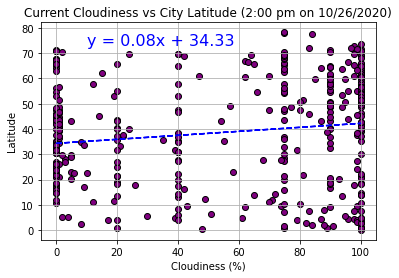

In [52]:
Temp=Ncities_df["Cloudiness (%)"]
Lat=Ncities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Cloudiness vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(10,73),size=16,c='b')
plt.savefig("Output/10262020CloudinessVsNorthLat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03616293120107963


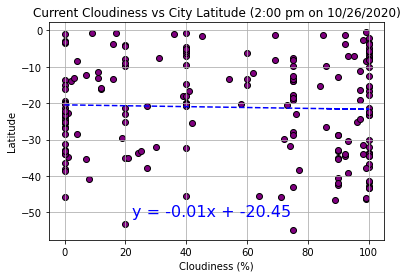

In [55]:
Temp=Scities_df["Cloudiness (%)"]
Lat=Scities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Cloudiness vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(22,-51),size=16,c='b')
plt.savefig("Output/10262020CloudinessVsSouthLat.png")
plt.show()

Cloudiness does not seem to depend on latitude at all according to the r-value of both hemisphere data sets. The vertical lines in the plot 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1357619728658036


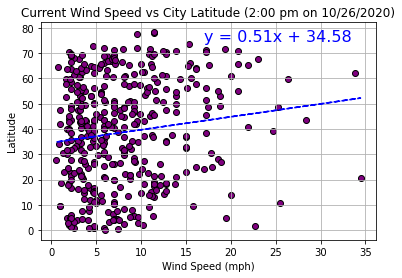

In [61]:
Temp=Ncities_df["Wind_Speed (mph)"]
Lat=Ncities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Wind Speed vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(17,74.5),size=16,c='b')
plt.savefig("Output/10262020WindVsNorthLat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15263037207479677


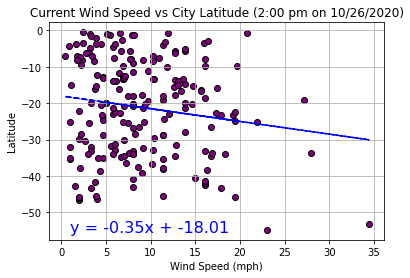

In [67]:
Temp=Scities_df["Wind_Speed (mph)"]
Lat=Scities_df["Latitude"]

slope, intercept, r_val, p_val, std_err = st.linregress(Temp, Lat)
fit = slope * Temp + intercept
plt.scatter(Temp, Lat, marker="o", facecolors="purple", edgecolors="black")
plt.plot(Temp,fit,"--",color="blue")

print(f"The r-value is: {r_val}")

plt.title("Current Wind Speed vs City Latitude (2:00 pm on 10/26/2020)")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(1,-55.5),size=16,c='b')
plt.savefig("Output/10262020WindVsSouthLat.png")
plt.show()

Wind speed and latitude do not seem to have any correlation based off of the r values.